In [1]:
import os

os.chdir("..")
print(f"Changed working directory to: {os.getcwd()}")

Changed working directory to: /Users/gabriel.torres/Nextcloud/Development/Pro5D/FlareSense


In [2]:
import torch
import src.utils.data as data
import matplotlib.pyplot as plt

from torchvision import transforms
from torchvision.transforms.functional import to_pil_image

# Settings
torch.manual_seed(0)

### Überprüfung der Daten von australia_assa_02 mit Timesplit

In [8]:
# Als DataModule (Trainings-, Validierungs- und Testdaten unterteilt)
data_folder_path = "data/raw/burst_images/"

data_module = data.ECallistoDataModule(
    data_folder=data_folder_path,
    transform=transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((193, 240), antialias=True),
            transforms.ToTensor(),
        ]
    ),
    batch_size=32,
    num_workers=0,
    val_ratio=0.15,
    test_ratio=0.15,
    split_by_date=True,
    filter_instruments=["australia_assa_02"],
)
data_module.setup()

In [9]:
labels = data_module.observations["label"].unique()
for name, observation_df in [
    ("Train", data_module.train_dataset.observations),
    ("Val", data_module.val_dataset.observations),
    ("Test", data_module.test_dataset.observations),
]:
    print(f"\n{name}:")
    instrument_counts = observation_df["instrument"].value_counts()
    for instrument, count in instrument_counts.items():
        print(f"\tInstrument: {instrument}, Anzahl: {count}")
        for label in labels:
            label_count = len(
                observation_df[(observation_df["instrument"] == instrument) & (observation_df["label"] == label)]
            )
            print(f"\t\tLabel: {label}, Anzahl: {label_count}")


Train:
	Instrument: australia_assa_02, Anzahl: 16526
		Label: no_burst, Anzahl: 15776
		Label: 6, Anzahl: 416
		Label: 4, Anzahl: 6
		Label: 3, Anzahl: 241
		Label: 2, Anzahl: 85
		Label: 5, Anzahl: 2

Val:
	Instrument: australia_assa_02, Anzahl: 3655
		Label: no_burst, Anzahl: 3513
		Label: 6, Anzahl: 67
		Label: 4, Anzahl: 9
		Label: 3, Anzahl: 55
		Label: 2, Anzahl: 9
		Label: 5, Anzahl: 2

Test:
	Instrument: australia_assa_02, Anzahl: 3464
		Label: no_burst, Anzahl: 3173
		Label: 6, Anzahl: 249
		Label: 4, Anzahl: 0
		Label: 3, Anzahl: 42
		Label: 2, Anzahl: 0
		Label: 5, Anzahl: 0


### Overlap überprüfen

In [20]:
# check overlaps train and val
files_train = data_module.train_dataset.observations["file_path"].to_list()
files_val = data_module.val_dataset.observations["file_path"].to_list()
print(f"Intersection in train and val: {len(set(files_train).intersection(set(files_val)))}")

# check overlaps train and test
files_test = data_module.test_dataset.observations["file_path"].to_list()
print(f"Intersection in train and test: {len(set(files_train).intersection(set(files_test)))}")

# check overlaps val and test
print(f"Intersection in val and test: {len(set(files_val).intersection(set(files_test)))}")

Intersection in train and val: 0
Intersection in train and test: 0
Intersection in val and test: 0


### Überprüfung der Batches

In [21]:
train_loader = data_module.train_dataloader()
image, info = next(iter(train_loader))

print(f"Image shape: {image.shape}")
print({key: value[0] for key, value in info.items()})

Image shape: torch.Size([32, 1, 193, 240])
{'file_path': 'data/raw/burst_images/no_burst/2021-05-04 07-57-00_2021-05-04 07-58-00_australia_assa_02_None_no_burst.png', 'start': '2021-05-04 07:57:00', 'end': '2021-05-04 07:58:00', 'instrument': 'australia_assa_02', 'label': 'no_burst'}


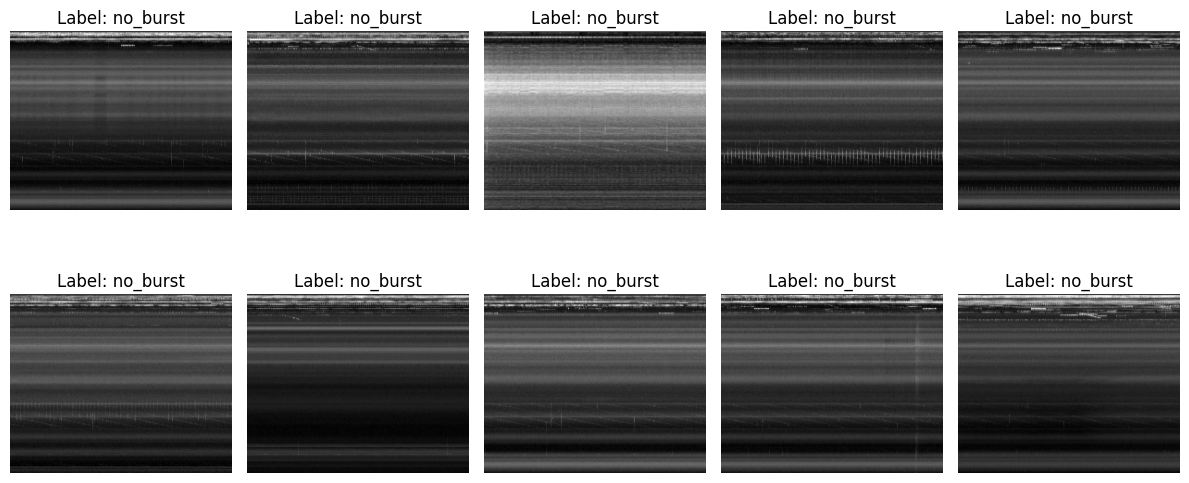

In [28]:
# Extrahieren der ersten 10 Bilder aus der Variable images
first_10_images = image[:10]

# Zeigen Sie die Bilder an
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    # Wandeln Sie den Tensor in ein PIL-Bild um
    pil_image = to_pil_image(first_10_images[i])

    # Zeigen Sie das PIL-Bild an
    ax.imshow(pil_image, cmap="gray")
    ax.title.set_text(f"Label: {info['label'][i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Überprüfung der Daten von australia_assa_02 ohne Timesplit

In [23]:
# Als DataModule (Trainings-, Validierungs- und Testdaten unterteilt)
data_folder_path = "data/raw/burst_images/"

data_module = data.ECallistoDataModule(
    data_folder=data_folder_path,
    transform=transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((193, 240), antialias=True),
            transforms.ToTensor(),
        ]
    ),
    batch_size=32,
    num_workers=0,
    val_ratio=0.15,
    test_ratio=0.15,
    split_by_date=False,
    filter_instruments=["australia_assa_02"],
)
data_module.setup()

In [24]:
labels = data_module.observations["label"].unique()
for name, observation_df in [
    ("Train", data_module.train_dataset.observations),
    ("Val", data_module.val_dataset.observations),
    ("Test", data_module.test_dataset.observations),
]:
    print(f"\n{name}:")
    instrument_counts = observation_df["instrument"].value_counts()
    for instrument, count in instrument_counts.items():
        print(f"\tInstrument: {instrument}, Anzahl: {count}")
        for label in labels:
            label_count = len(
                observation_df[(observation_df["instrument"] == instrument) & (observation_df["label"] == label)]
            )
            print(f"\t\tLabel: {label}, Anzahl: {label_count}")


Train:
	Instrument: australia_assa_02, Anzahl: 16542
		Label: no_burst, Anzahl: 15709
		Label: 6, Anzahl: 514
		Label: 4, Anzahl: 11
		Label: 3, Anzahl: 238
		Label: 2, Anzahl: 66
		Label: 5, Anzahl: 4

Val:
	Instrument: australia_assa_02, Anzahl: 3555
		Label: no_burst, Anzahl: 3380
		Label: 6, Anzahl: 109
		Label: 4, Anzahl: 2
		Label: 3, Anzahl: 50
		Label: 2, Anzahl: 14
		Label: 5, Anzahl: 0

Test:
	Instrument: australia_assa_02, Anzahl: 3548
		Label: no_burst, Anzahl: 3373
		Label: 6, Anzahl: 109
		Label: 4, Anzahl: 2
		Label: 3, Anzahl: 50
		Label: 2, Anzahl: 14
		Label: 5, Anzahl: 0


In [25]:
# check overlaps train and val
files_train = data_module.train_dataset.observations["file_path"].to_list()
files_val = data_module.val_dataset.observations["file_path"].to_list()
print(f"Intersection in train and val: {len(set(files_train).intersection(set(files_val)))}")

# check overlaps train and test
files_test = data_module.test_dataset.observations["file_path"].to_list()
print(f"Intersection in train and test: {len(set(files_train).intersection(set(files_test)))}")

# check overlaps val and test
print(f"Intersection in val and test: {len(set(files_val).intersection(set(files_test)))}")

Intersection in train and val: 0
Intersection in train and test: 0
Intersection in val and test: 0
